In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path

def find_root():
    current = Path.cwd().resolve()
    for path in [current] + list(current.parents):
        if (path / "data").exists():
            return path
    return current

PROJECT_ROOT = find_root()
PROCESSED_DIR = PROJECT_ROOT / "data" / "processed"

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_context("notebook", font_scale=1.1)

try:
    file_path = PROCESSED_DIR / "FINAL_weekly_natural_gas_data.csv"
    df = pd.read_csv(file_path)
    
    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date').sort_index()
    
    df['year'] = df.index.year
    df['month'] = df.index.month
    
    print(f"Chapter 1 Complete: Data Loaded.")
    print(f"   - We have {df.shape[0]} weeks of history.")
    print(f"   - Spanning from {df.index.min().date()} to {df.index.max().date()}.")
    display(df.head())
    
except FileNotFoundError:
    print("CRITICAL ERROR: The data is missing! Run notebook 02 first.")

Chapter 1 Complete: Data Loaded.
   - We have 1511 weeks of history.
   - Spanning from 1997-01-17 to 2026-01-02.


,price,log_return,HDD,CDD,NGPL Production,Natural Gas Balancing Item,Natural Gas Consumption,Natural Gas Exports,Natural Gas Gross Withdrawals,Natural Gas Imports,Natural Gas Marketed Production (Wet),Natural Gas Net Imports,Natural Gas Net Storage Withdrawals,Natural Gas Production (Dry),Supplemental Gaseous Fuels,year,month
date,,,,,,,,,,,,,,,,,
1997-01-17,3.91,-0.002554,935.0,8.0,82.811,-69.813,2540.341,12.028,2086.781,278.288,1707.002,266.259,709.028,1624.195,10.672,1997,1
1997-01-24,2.62,-0.400363,935.0,8.0,82.811,-69.813,2540.341,12.028,2086.781,278.288,1707.002,266.259,709.028,1624.195,10.672,1997,1
1997-01-31,2.77,0.055673,935.0,8.0,82.811,-69.813,2540.341,12.028,2086.781,278.288,1707.002,266.259,709.028,1624.195,10.672,1997,1
1997-02-07,2.39,-0.147554,677.0,12.0,75.031,193.108,2273.601,12.443,1903.271,240.545,1546.616,228.102,371.446,1471.590,9.354,1997,2
1997-02-14,2.12,-0.119877,677.0,12.0,75.031,193.108,2273.601,12.443,1903.271,240.545,1546.616,228.102,371.446,1471.590,9.354,1997,2


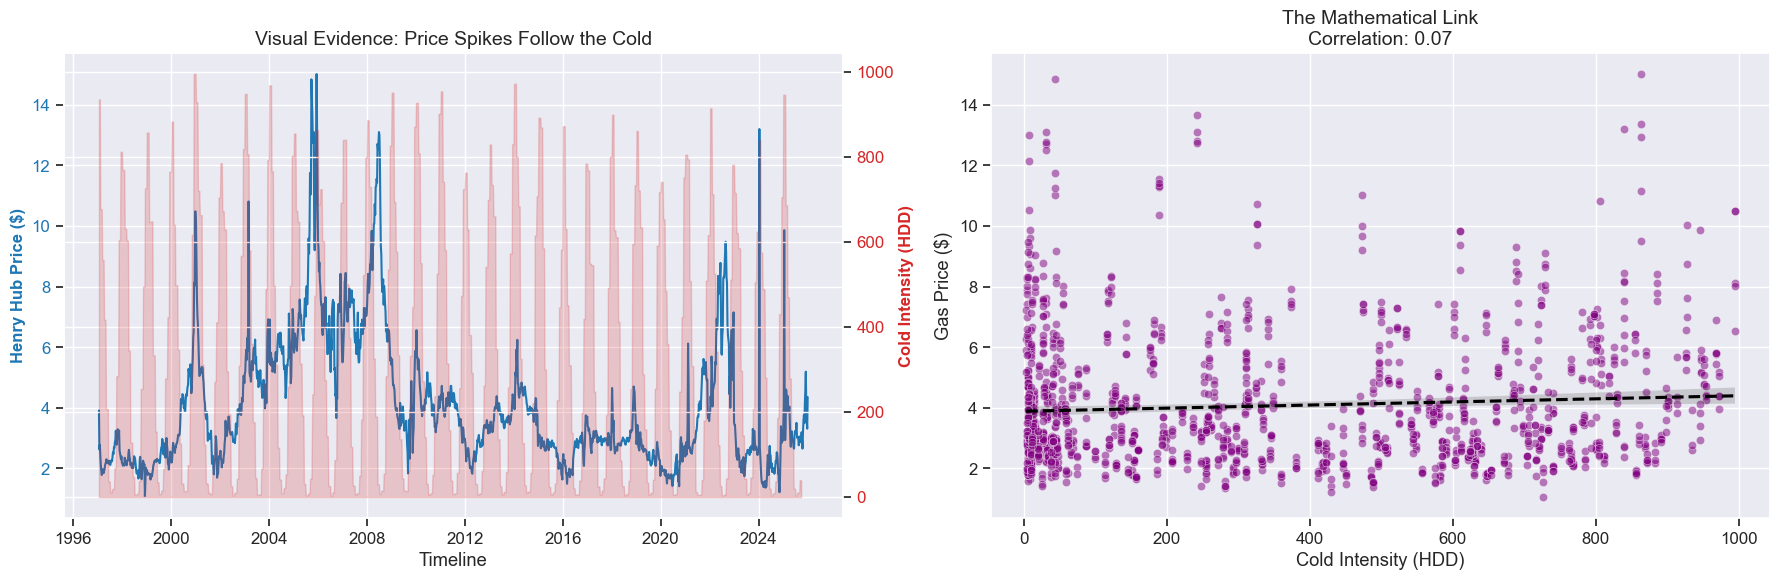

NOTES:
1. Notice the Red Mountains (Winter). Almost every Blue Spike happens inside a Red Mountain.
2. But look at 2005/2008... huge spikes without huge cold. Something else happened there (Hurricanes? Recession?).


In [12]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

color_price = 'tab:blue'
ax1.set_xlabel('Timeline')
ax1.set_ylabel('Henry Hub Price ($)', color=color_price, fontsize=12, fontweight='bold')
ax1.plot(df.index, df['price'], color=color_price, linewidth=1.5, label='Gas Price')
ax1.tick_params(axis='y', labelcolor=color_price)

ax1_twin = ax1.twinx()
color_hdd = 'tab:red'
ax1_twin.set_ylabel('Cold Intensity (HDD)', color=color_hdd, fontsize=12, fontweight='bold')

ax1_twin.fill_between(df.index, df['HDD'], color=color_hdd, alpha=0.2, label='Cold Weather')
ax1_twin.tick_params(axis='y', labelcolor=color_hdd)
ax1.set_title('Visual Evidence: Price Spikes Follow the Cold', fontsize=14)

sns.scatterplot(x=df['HDD'], y=df['price'], alpha=0.5, ax=ax2, color='purple')
sns.regplot(x=df['HDD'], y=df['price'], scatter=False, ax=ax2, color='black', line_kws={"linestyle": "--"})

correlation = df['HDD'].corr(df['price'])
ax2.set_title(f"The Mathematical Link\nCorrelation: {correlation:.2f}", fontsize=14)
ax2.set_xlabel('Cold Intensity (HDD)')
ax2.set_ylabel('Gas Price ($)')

plt.tight_layout()
plt.show()

print("NOTES:")
print("1. Notice the Red Mountains (Winter). Almost every Blue Spike happens inside a Red Mountain.")
print("2. But look at 2005/2008... huge spikes without huge cold. Something else happened there (Hurricanes? Recession?).")

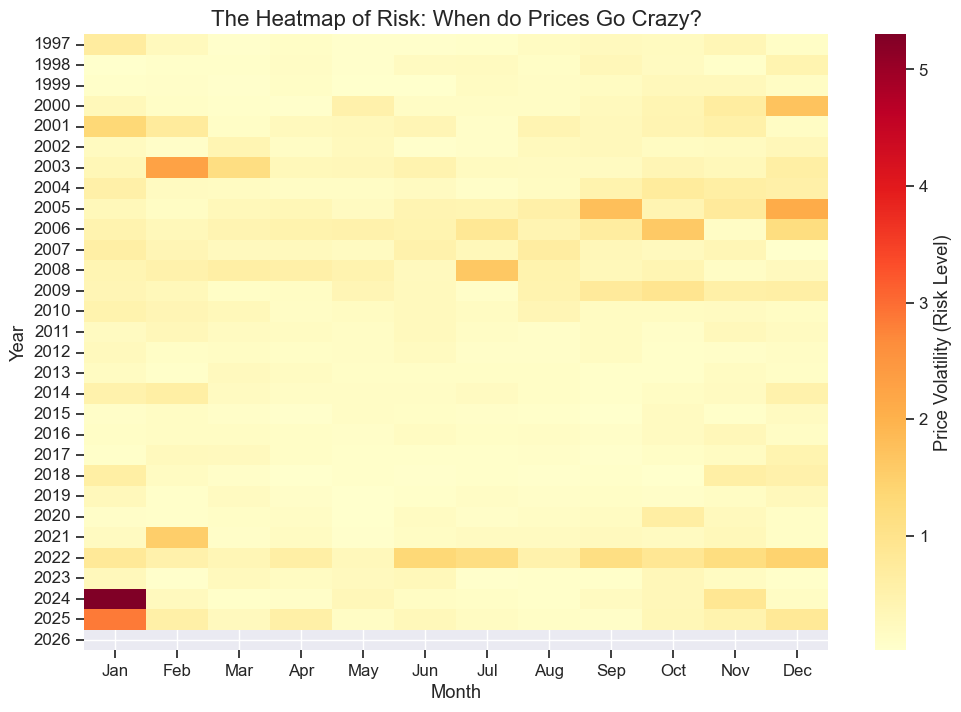

MAP LEGEND:
- LIGHT YELLOW: Calm seas. Safe for trading.
- DARK RED: Stormy weather. Prices swing wildly.
- NOTICE: January and February are traditionally the 'Red Zones'.
- BUT: Look at the 2020-2022 era... the map is turning red again everywhere!


In [13]:
volatility_pivot = df.groupby(['year', 'month'])['price'].std().unstack()

plt.figure(figsize=(12, 8))

sns.heatmap(volatility_pivot, cmap='YlOrRd', annot=False, 
            cbar_kws={'label': 'Price Volatility (Risk Level)'})

month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.xticks(ticks=np.arange(0.5, 12.5), labels=month_names, rotation=0)
plt.title('The Heatmap of Risk: When do Prices Go Crazy?', fontsize=16)
plt.ylabel('Year')
plt.xlabel('Month')

plt.show()

print("MAP LEGEND:")
print("- LIGHT YELLOW: Calm seas. Safe for trading.")
print("- DARK RED: Stormy weather. Prices swing wildly.")
print("- NOTICE: January and February are traditionally the 'Red Zones'.")
print("- BUT: Look at the 2020-2022 era... the map is turning red again everywhere!")

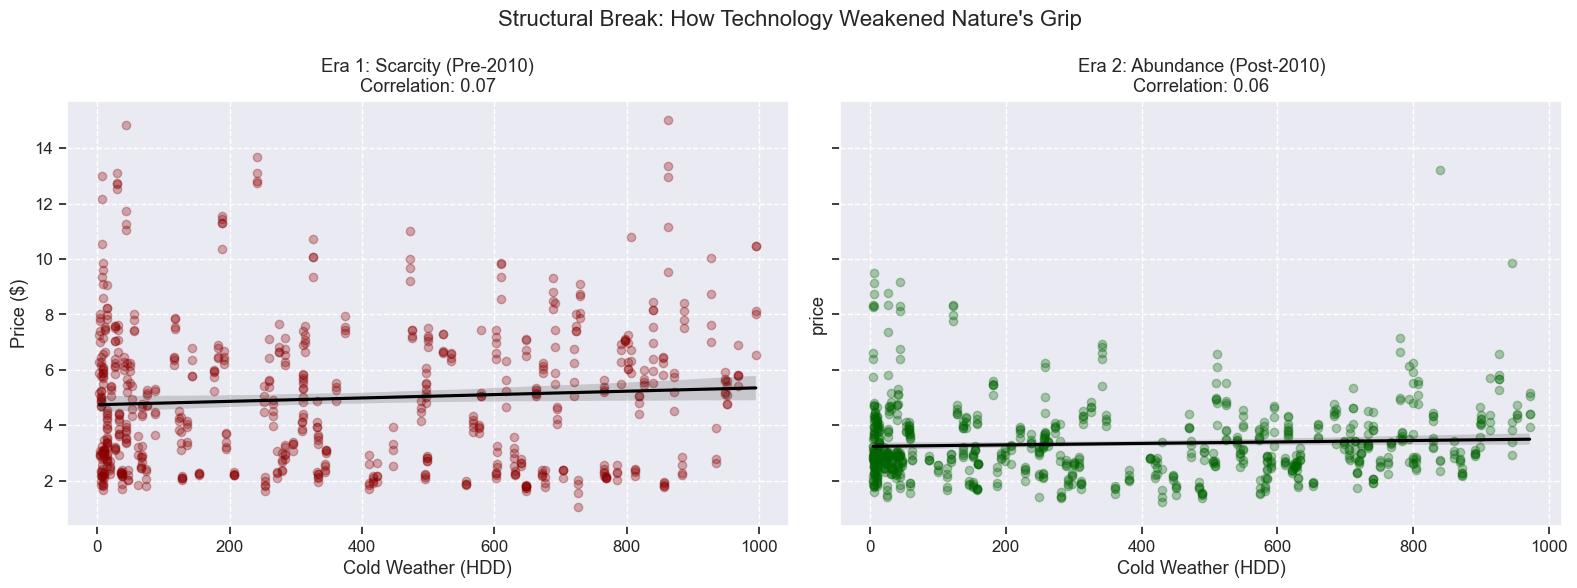

THE FINAL VERDICT:
   - In the Scarcity Era, the average price was $4.96.
   - In the Abundance Era, the average price dropped to $3.33.
   - Technology caused a 32.8% structural drop in energy prices.
   - Notice how the Green Scatter plot is much flatter? Weather matters less now because we have so much supply.


In [10]:
cutoff_year = 2010
pre_shale = df[df.index.year < cutoff_year]
post_shale = df[df.index.year >= cutoff_year]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

sns.regplot(x='HDD', y='price', data=pre_shale, ax=ax1, 
            scatter_kws={'alpha':0.3, 'color':'darkred'}, line_kws={'color':'black'})
ax1.set_title(f'Era 1: Scarcity (Pre-2010)\nCorrelation: {pre_shale["HDD"].corr(pre_shale["price"]):.2f}')
ax1.set_xlabel('Cold Weather (HDD)')
ax1.set_ylabel('Price ($)')
ax1.grid(True, linestyle='--')

sns.regplot(x='HDD', y='price', data=post_shale, ax=ax2, 
            scatter_kws={'alpha':0.3, 'color':'darkgreen'}, line_kws={'color':'black'})
ax2.set_title(f'Era 2: Abundance (Post-2010)\nCorrelation: {post_shale["HDD"].corr(post_shale["price"]):.2f}')
ax2.set_xlabel('Cold Weather (HDD)')
ax2.grid(True, linestyle='--')

plt.suptitle('Structural Break: How Technology Weakened Nature\'s Grip', fontsize=16)
plt.tight_layout()
plt.show()

avg_old = pre_shale['price'].mean()
avg_new = post_shale['price'].mean()
drop = ((avg_old - avg_new) / avg_old) * 100

print(f"THE FINAL VERDICT:")
print(f"   - In the Scarcity Era, the average price was ${avg_old:.2f}.")
print(f"   - In the Abundance Era, the average price dropped to ${avg_new:.2f}.")
print(f"   - Technology caused a {drop:.1f}% structural drop in energy prices.")
print(f"   - Notice how the Green Scatter plot is much flatter? Weather matters less now because we have so much supply.")